In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data = pd.read_csv('AluminiumDataset.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [3]:
data.head(10)

,Price
Month,
1998-01-05,55096.35
1998-01-06,55227.92
1998-01-07,55655.09
1998-01-08,56027.24
1998-01-09,57074.54
1998-01-10,55220.42
1998-01-11,54876.71
1998-01-12,53152.61
1999-01-01,51794.30


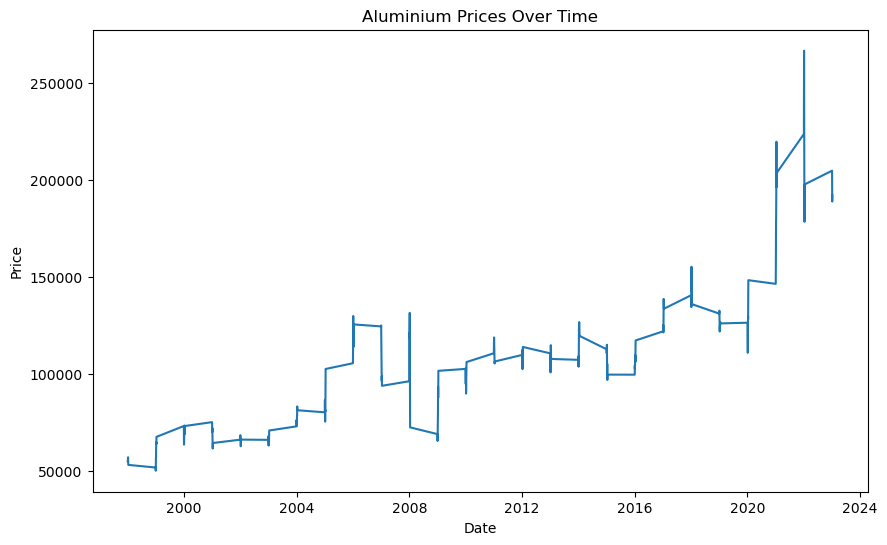

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Aluminium Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

In [7]:
test_result=adfuller(data['Price'])

In [8]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adfuller_test(data['Price'])

ADF Test Statistic : -1.0816654680953803
p-value : 0.7223278515236469
#Lags Used : 2
Number of Observations Used : 297
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [10]:
data['Price First Difference'] = data['Price'] - data['Price'].shift(1)

In [11]:
data['Seasonal First Difference']=data['Price']-data['Price'].shift(12)

In [12]:
data

,Price,Price First Difference,Seasonal First Difference
Month,,,
1998-01-05,55096.35,NaN,NaN
1998-01-06,55227.92,131.57,NaN
1998-01-07,55655.09,427.17,NaN
1998-01-08,56027.24,372.15,NaN
1998-01-09,57074.54,1047.30,NaN
...,...,...,...
2022-01-12,197806.40,5452.40,-5812.0
2023-01-01,204871.50,7065.10,-18918.8
2023-01-02,199586.70,-5284.80,-43952.1


In [14]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.173640056101915
p-value : 0.0007299670243816831
#Lags Used : 15
Number of Observations Used : 272
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
adfuller_test(data['Price First Difference'].dropna())

ADF Test Statistic : -11.51506619708497
p-value : 4.169386525233237e-21
#Lags Used : 1
Number of Observations Used : 297
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

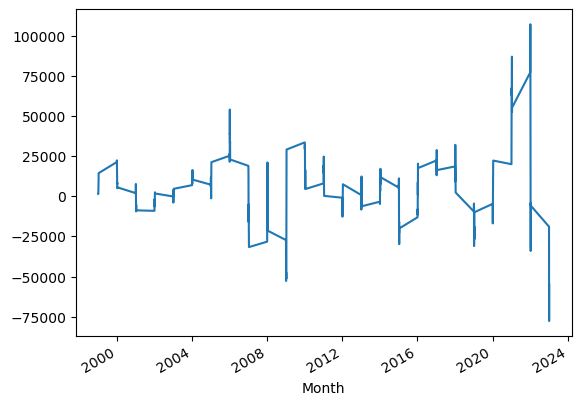

In [16]:
data['Seasonal First Difference'].plot()

<AxesSubplot:xlabel='Month'>

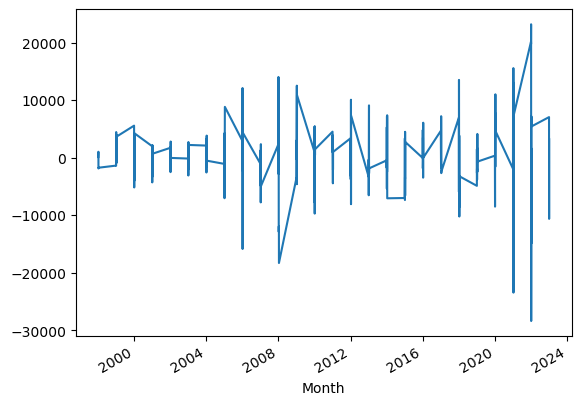

In [17]:
data['Price First Difference'].plot()

In [19]:
data.dropna(inplace=True)

In [20]:
data

,Price,Price First Difference,Seasonal First Difference
Month,,,
1999-01-05,56605.64,1993.12,1509.29
1999-01-06,56738.89,133.25,1510.97
1999-01-07,60763.66,4024.77,5108.57
1999-01-08,62206.47,1442.81,6179.23
1999-01-09,64979.87,2773.40,7905.33
...,...,...,...
2022-01-12,197806.40,5452.40,-5812.00
2023-01-01,204871.50,7065.10,-18918.80
2023-01-02,199586.70,-5284.80,-43952.10


In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

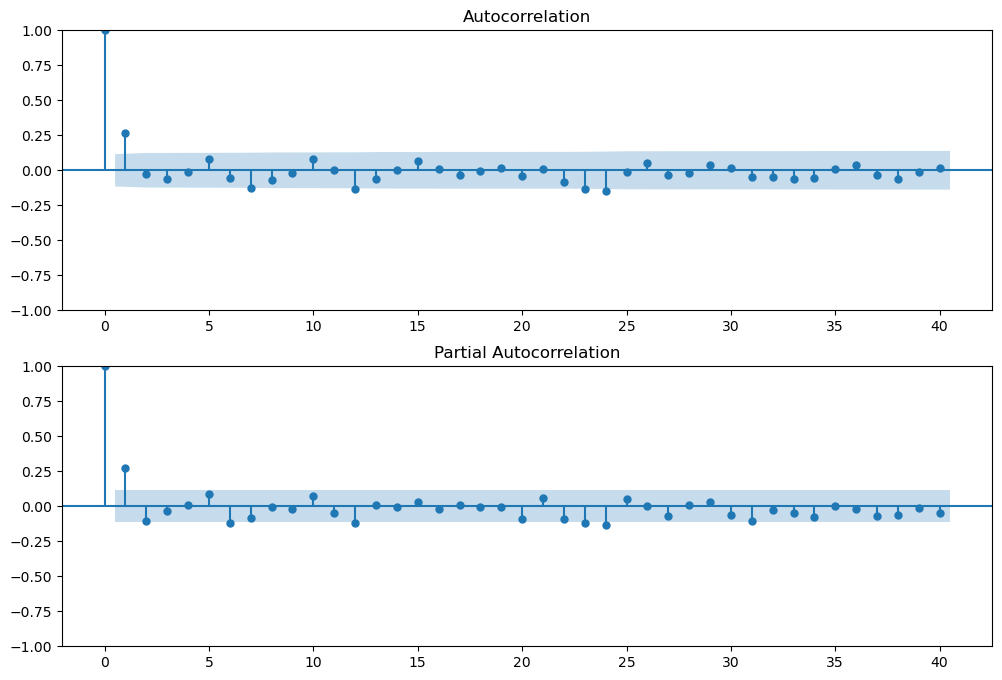

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['Price First Difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Price First Difference'].iloc[1:],lags=40,ax=ax2)

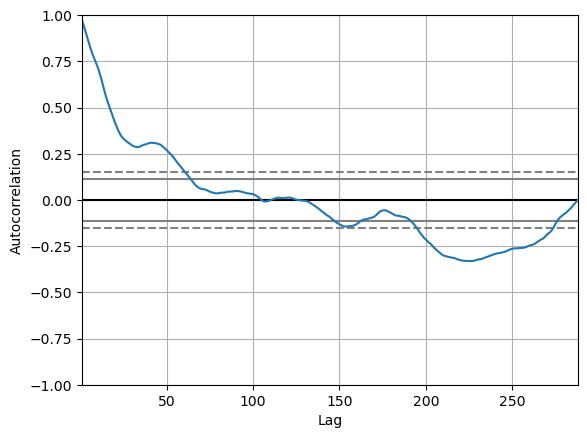

In [45]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Price'])
plt.show()

In [46]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [48]:
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()

C:\Users\Aiman Gupta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: SARIMAX models require univariate `endog`. Got shape (230, 4).